Assignment - 02

Name: Preetham Ganesh
UTA ID:  1001773078

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import numpy as np

class KNearestNeighbors():
    def __init__(self, n_neighbors, distance):
        self.n_neighbors = n_neighbors
        self.distance = distance
        self.data_x = None
        self.data_y = None

    def euclidean(self, x1, x2):
        return np.sqrt(np.sum(np.square(np.subtract(x1, x2))))

    def normalized_euclidean(self, x1, x2):
        x1 = x1 / (np.sqrt(np.sum(np.square(x1))))
        x2 = x2 / (np.sqrt(np.sum(np.square(x2))))
        return np.sqrt(np.sum(np.square(np.subtract(x1, x2))))

    def cosine_similarity(self, x1, x2):
        return 1 - np.dot(x1, x2) / (np.sqrt(np.dot(x1, x1)) * np.sqrt(np.dot(x2, x2)))

    def fit(self, data_x, data_y):
        self.data_x = data_x
        self.data_y = data_y

    def predict(self, new_data_x):
        train_distances = []
        for j in range(len(self.data_x)):
            if self.distance == 'euclidean':
                element = (self.euclidean(new_data_x, self.data_x[j]), j, self.data_y[j])
            elif self.distance == 'normalized_euclidean':
                element = (self.normalized_euclidean(new_data_x, self.data_x[j]), j, self.data_y[j])
            else:
                element = (self.cosine_similarity(new_data_x, self.data_x[j]), j, self.data_y[j])
            train_distances.append(element)
        train_distances.sort(reverse=False)
        new_train_distances = train_distances[:self.n_neighbors]
        pred_y = [new_train_distances[j][2] for j in range(len(new_train_distances))]
        if len(list(np.unique(pred_y))) == len(pred_y):
            return pred_y[0]
        else:
            count = []
            for j in list(np.unique(pred_y)):
                c = 0
                for k in pred_y:
                    if int(j) == int(k):
                        c += 1
                count.append(c)
            maximum_count = max(count)
            maximum_count_index = count.index(maximum_count)
            return pred_y[maximum_count_index]

In [3]:
def data_preprocessing(data):
    data = data.dropna()
    data = shuffle(data, random_state=0)
    class_names = list(np.unique(list(data['class'])))
    data['class'] = [class_names.index(i) for i in list(data['class'])]
    train, val = train_test_split(data, test_size=0.4, random_state=1)
    val, test = train_test_split(val, test_size=0.5, random_state=1)
    return train, val, test, class_names

In [4]:
def accuracy_score(actual, predict):
    acc = 0
    for i, j, in zip(actual, predict):
        if int(i) == int(j):
            acc += 1
    return round(acc/len(actual), 3)

In [5]:
def k_nearest_neighbors(k, train, val, test):
    distances = ['euclidean', 'normalized_euclidean', 'cosine_similarity']
    train_x, train_y = train.drop(columns=['class']).values, train['class'].values
    val_x, val_y = val.drop(columns=['class']).values, val['class'].values
    test_x, test_y = test.drop(columns=['class']).values, test['class'].values
    acc_scores = []
    for j in distances:
        k_acc_scores = []
        for i in k:
            model = KNearestNeighbors(n_neighbors=i, distance=j)
            model.fit(train_x, train_y)
            pred_y = [model.predict(val_x[l]) for l in range(len(val_x))]
            acc = accuracy_score(val_y, pred_y)
            k_acc_scores.append(acc)
            acc_scores.append(acc)
        plt.bar(k, k_acc_scores)
        plt.xticks(k)
        plt.xlabel('K values')
        plt.ylabel('Accuracy scores')
        plt.title('Bar Chart for Accuracy scores with ' + j + ' as metric')
        plt.show()
        plt.scatter(k, k_acc_scores)
        plt.xticks(k)
        plt.xlabel('K values')
        plt.ylabel('Accuracy scores')
        plt.title('Scatter Plot for Accuracy scores with ' + j + ' as metric')
        plt.show()
    max_acc = max(acc_scores)
    max_acc_ind = acc_scores.index(max_acc)
    best_distance = int(max_acc_ind / len(distances))
    best_k = int(max_acc_ind % len(distances))
    print('Best model configuration: ')
    print('Best K: ', k[best_k])
    print('Best Distance measure: ', distances[best_distance])
    best_model = KNearestNeighbors(n_neighbors=k[best_k], distance=distances[best_distance])
    best_model.fit(train_x, train_y)
    pred_y = [best_model.predict(test_x[l]) for l in range(len(test_x))]
    print('Accuracy score of best model: ', accuracy_score(test_y, pred_y))
    print('Notebook can be downloaded at https://github.com/preetham7897/website/blob/master/documents/ganesh_02.ipynb')

In [6]:
def main():
    k = [1, 3, 5, 7]
    data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
    print()
    print('Total Dataset size: ', len(data))
    train, val, test, class_names = data_preprocessing(data)
    print()
    print('Training set size: ', len(train))
    print('Validation set size: ', len(val))
    print('Testing set size: ', len(test))
    print()
    k_nearest_neighbors(k, train, val, test)


Total Dataset size:  150

Training set size:  90
Validation set size:  30
Testing set size:  30



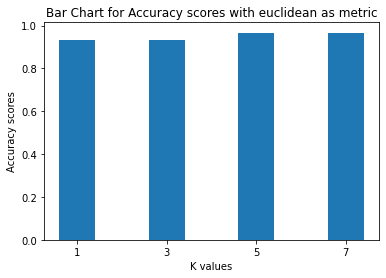

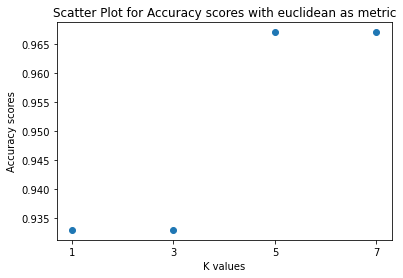

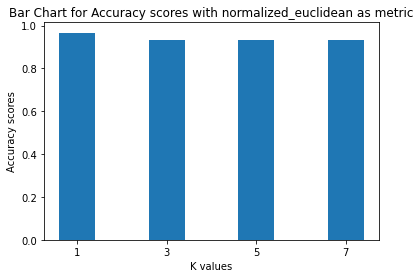

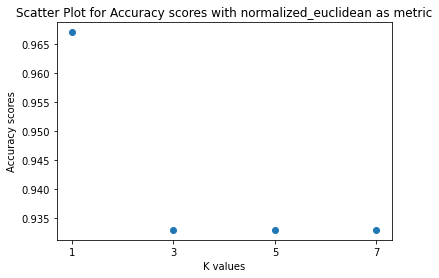

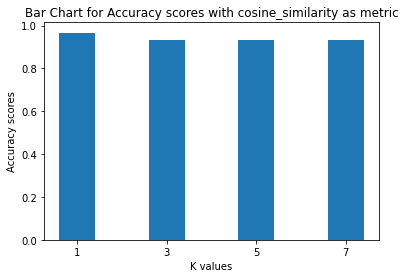

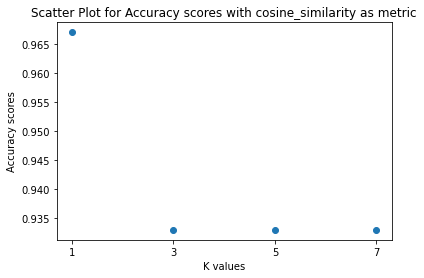

Best model configuration: 
Best K:  5
Best Distance measure:  euclidean
Accuracy score of best model:  0.933
Notebook can be downloaded at https://github.com/preetham7897/website/blob/master/documents/ganesh_02.ipynb


In [7]:
main()